In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
import numpy as np

def differential_drive_step(state, control, dt):
    """
    state: [x, y, theta]
    control: [v, omega]  
    dt: временной шаг
    """
    x, y, theta = state
    v, omega = control
    
    if abs(omega) < 1e-6:  # прямолинейное движение
        new_x = x + v * np.cos(theta) * dt
        new_y = y + v * np.sin(theta) * dt
        new_theta = theta
    else:  # движение по дуге
        dtheta = omega * dt
        R = v / omega
        
        new_x = x + R * (np.sin(theta + dtheta) - np.sin(theta))
        new_y = y + R * (-np.cos(theta + dtheta) + np.cos(theta))
        new_theta = theta + dtheta
    
    return np.array([new_x, new_y, new_theta])

In [3]:
def evolve_from_start(x_0, T, N):
    combs = list(product([-1, 0, 1], repeat=2))
    t_array = np.linspace(0, T, N)
    xs = np.zeros((len(combs), N, 3))
    for i, comb in enumerate(combs):
        v_sign, o_sign = comb
        v = v_abs * v_sign
        o = o_abs * o_sign
        u = np.array([v, o])
        for j, dt in enumerate(t_array):
            xs[i, j] = differential_drive_step(x_0, u, dt)
    return xs


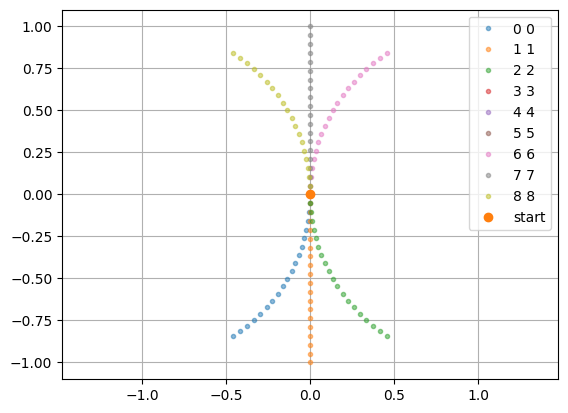

In [4]:
T = 1
N = 20
t_array = np.linspace(0, T, N)
x_0 = np.array([0, 0, np.pi/2])
v_abs = 1
o_abs = 1

xs = evolve_from_start(x_0, T, N)

for i in range(len(xs)):
    plt.plot(xs[i, :, 0], xs[i, :, 1], '.', color=f'C{i}', alpha=0.5, label=f'{i} {i}')
plt.plot(0, 0, 'o', color='C1', label='start')
plt.legend()
plt.axis('equal')
plt.grid()

In [16]:
import plotly.graph_objects as go

fig = go.Figure()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

for i in range(xs.shape[0]):
    fig.add_trace(go.Scatter3d(
        x=xs[i, :, 0],
        y=xs[i, :, 1], 
        z=xs[i, :, 2],
        mode='markers+lines',
        marker=dict(size=4, color=colors[i % len(colors)]),
        line=dict(color=colors[i % len(colors)], width=3),
    ))

# Стартовая точка
fig.add_trace(go.Scatter3d(
    x=[x_0[0]], y=[x_0[1]], z=[x_0[2]],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='Start'
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y', 
        zaxis_title='θ (theta)'
    ),
    title='3D траектории дифференциального драйва',
    width=800,
    height=600
)

fig.show()

In [5]:
fins = xs[:, -1, :]
tree = np.zeros((len(fins), *xs.shape))

for i, fin in enumerate(fins):
    tree[i] = evolve_from_start(fin, T, N)

print()





In [6]:
import plotly.graph_objects as go

fig = go.Figure()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

for j in range(tree.shape[0]):
    for i in range(tree.shape[1]):
        fig.add_trace(go.Scatter3d(
            x=tree[j, i, :, 0],
            y=tree[j, i, :, 1], 
            z=tree[j, i, :, 2],
            mode='markers+lines',
            marker=dict(size=4, color=colors[i % len(colors)]),
            line=dict(color=colors[i % len(colors)], width=3),
        ))

# Стартовая точка
fig.add_trace(go.Scatter3d(
    x=[x_0[0]], y=[x_0[1]], z=[x_0[2]],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='Start'
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y', 
        zaxis_title='θ (theta)'
    ),
    title='3D траектории дифференциального драйва',
    width=800,
    height=600
)

fig.show()

In [10]:
list(product([-1, 0, 1], repeat=2))

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [9]:
lines = list(product(list(product([-1, 0, 1], repeat=2)), repeat=3))
print(len(lines))
lines

729


[((-1, -1), (-1, -1), (-1, -1)),
 ((-1, -1), (-1, -1), (-1, 0)),
 ((-1, -1), (-1, -1), (-1, 1)),
 ((-1, -1), (-1, -1), (0, -1)),
 ((-1, -1), (-1, -1), (0, 0)),
 ((-1, -1), (-1, -1), (0, 1)),
 ((-1, -1), (-1, -1), (1, -1)),
 ((-1, -1), (-1, -1), (1, 0)),
 ((-1, -1), (-1, -1), (1, 1)),
 ((-1, -1), (-1, 0), (-1, -1)),
 ((-1, -1), (-1, 0), (-1, 0)),
 ((-1, -1), (-1, 0), (-1, 1)),
 ((-1, -1), (-1, 0), (0, -1)),
 ((-1, -1), (-1, 0), (0, 0)),
 ((-1, -1), (-1, 0), (0, 1)),
 ((-1, -1), (-1, 0), (1, -1)),
 ((-1, -1), (-1, 0), (1, 0)),
 ((-1, -1), (-1, 0), (1, 1)),
 ((-1, -1), (-1, 1), (-1, -1)),
 ((-1, -1), (-1, 1), (-1, 0)),
 ((-1, -1), (-1, 1), (-1, 1)),
 ((-1, -1), (-1, 1), (0, -1)),
 ((-1, -1), (-1, 1), (0, 0)),
 ((-1, -1), (-1, 1), (0, 1)),
 ((-1, -1), (-1, 1), (1, -1)),
 ((-1, -1), (-1, 1), (1, 0)),
 ((-1, -1), (-1, 1), (1, 1)),
 ((-1, -1), (0, -1), (-1, -1)),
 ((-1, -1), (0, -1), (-1, 0)),
 ((-1, -1), (0, -1), (-1, 1)),
 ((-1, -1), (0, -1), (0, -1)),
 ((-1, -1), (0, -1), (0, 0)),
 ((-1, -

In [73]:
N = 4
T = 1
ts = np.sort(np.random.uniform(0, T, size=(N, 2)))
dts = np.array([ts[:, 0], ts[:, 1] - ts[:, 0], T-ts[:, 1]]).T
dts

array([[0.9762666 , 0.00693215, 0.01680125],
       [0.67091259, 0.16068454, 0.16840288],
       [0.35888347, 0.54182716, 0.09928937],
       [0.60692745, 0.09258237, 0.30049018]])

In [74]:
xs = []
for dt_vector in dts:
    for line in lines:
        path = []
        path.append(differential_drive_step(x_0, line[0], dt_vector[0]))
        path.append(differential_drive_step(path[-1], line[1], dt_vector[1]))
        path.append(differential_drive_step(path[-1], line[2], dt_vector[2]))
        xs.append(path)
xs = np.array(xs)
xs.shape




(2916, 3, 3)

In [75]:
import plotly.graph_objects as go

fig = go.Figure()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
  
sizes = [10, 5, 4]
for i in range(xs.shape[1]):
    fig.add_trace(go.Scatter3d(
        x=xs[:, i, 0],
        y=xs[:, i, 1], 
        z=xs[:, i, 2],
        mode='markers',
        marker=dict(size=sizes[i], color=colors[i], opacity=0.6/(i+1)),
    ))

# Стартовая точка
fig.add_trace(go.Scatter3d(
    x=[x_0[0]], y=[x_0[1]], z=[x_0[2]],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='Start'
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y', 
        zaxis_title='θ (theta)'
    ),
    title='3D траектории дифференциального драйва',
    width=800,
    height=600
)

fig.show()